Random walk is a special type of time-series, where values tend to persist over time 
<br>
and different between periods are simply white noise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_theme()

In [2]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.ffill()
df_comp["market_value"] = df_comp.spx

In [3]:
del df_comp["spx"], df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]

In [4]:
size = int(len(df_comp) * 0.8)

In [5]:
df, df_test = df_comp[:size], df_comp[size:]

Random walk

In [14]:
rw = pd.read_csv("data/RandWalk.csv")

In [15]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [17]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)

In [18]:
rw.set_index('date', inplace=True)

In [19]:
rw.head(3)

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831


In [20]:
rw = rw.asfreq("b")

In [23]:
rw.isnull().sum()

price    0
dtype: int64

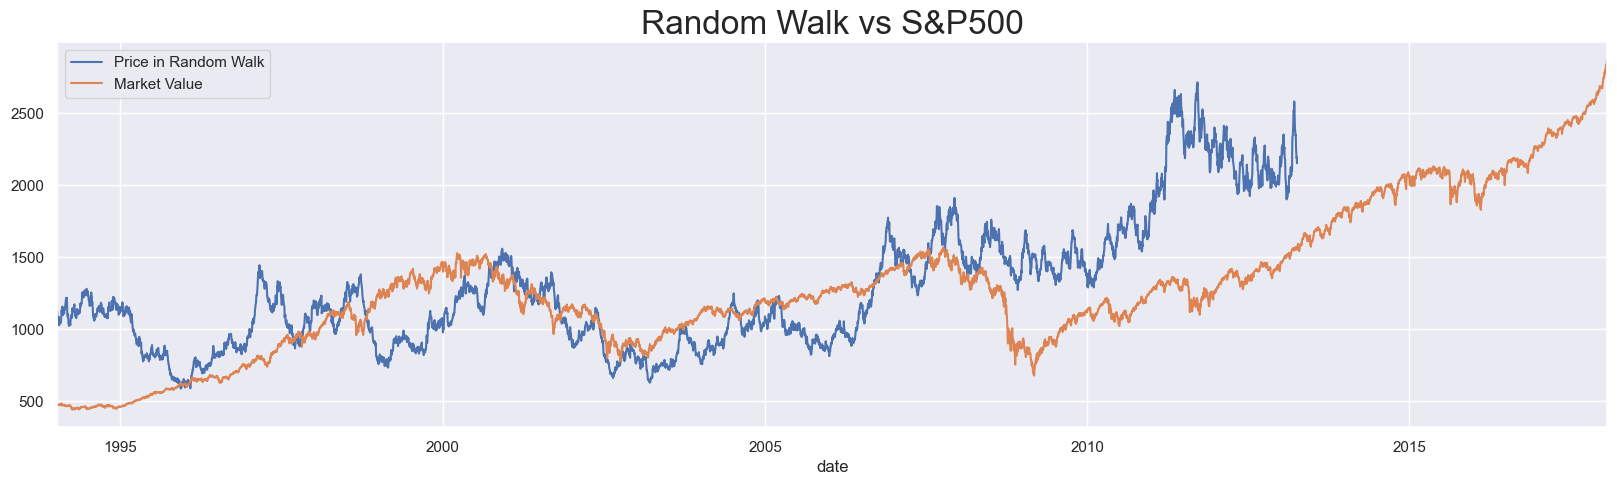

In [28]:
rw.price.plot(figsize=(20,5), label = "Price in Random Walk")
df_comp.market_value.plot(label = "Market Value")
plt.title("Random Walk vs S&P500", size = 24)
plt.legend()
plt.show()

Los gráficos parecen similares:
<br>
1 -  Small variations between consecutive time periods
<br>
2 - Cyclical increases and decreases in short periods of time

Market Effiency:
Measures the level of difficulty in forecasting correct future values

Arbitrage: Buy and sell commodities and make a safe profit, while the price adjusts
<br>
Investors: Take advantage